Исследование математической модели, Панкратов Александр, МТ-402

In [34]:
from IPython.display import display
from ipywidgets import *
from IPython.display import Image
from matplotlib import pyplot as plt
import math
import random

In [35]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [36]:
p = 3
Step = 0.0001
q = 1
def singular_point_x():
    return 1
def singular_point_y():
    return 1
noise_lvl = 0.002

In [37]:
def f(x,y):
    return 1-x*y

In [38]:
def g(x,y):
    return p*y*(x-(1+q)/(q+y))

In [39]:
def k1(x0,y0):
    return Step*f(x0,y0)

In [40]:
def l1(x0,y0):
    return Step*g(x0,y0)

In [41]:
def k2(x0,y0):
    x = x0+k1(x0,y0)/2
    y = y0+l1(x0,y0)/2 
    return Step*f(x,y)

In [42]:
def l2(x0,y0):
    x = x0+k1(x0,y0)/2
    y = y0+l1(x0,y0)/2
    return Step*g(x,y)

In [43]:
def k3(x0,y0):
    x = x0+k2(x0,y0)/2
    y = y0+l2(x0,y0)/2
    return Step*f(x,y)

In [44]:
def l3(x0,y0):
    x = x0+k2(x0,y0)/2
    y = y0+l2(x0,y0)/2
    return Step*g(x,y)

In [45]:
def k4(x0,y0):
    x = x0+k3(x0,y0)
    y = y0+l3(x0,y0)
    return Step*f(x,y)

In [46]:
def l4(x0,y0):
    x = x0+k3(x0,y0)
    y = y0+l3(x0,y0)
    return Step*g(x,y)

In [47]:
def rk(pair):
    x0 = float(pair[0])
    y0 = float(pair[1])
    x = pair[0] +1/6*(k1(x0,y0)+2*k2(x0,y0)+2*k3(x0,y0)+k4(x0,y0))
    y = pair[1] +1/6*(l1(x0,y0)+2*l2(x0,y0)+2*l3(x0,y0)+l4(x0,y0))
    return [x,y]

In [48]:
def curve(x0,y0,n):
    i = 0
    res_x = list()
    res_y = list()
    while i < n:
        res_x.append(x0)
        res_y.append(y0)
        current = rk([x0,y0])
        x0 = current[0]
        y0 = current[1]
        i+=1
    return[res_x,res_y]

In [49]:
def curve_reverse(x0,y0,n):
    global Step
    buf = Step
    Step = -buf
    i = 0
    res_x = list()
    res_y = list()
    while i < n:
        res_x.append(x0)
        res_y.append(y0)
        current = rk([x0,y0])
        x0 = current[0]
        y0 = current[1]
        i+=1
    Step = buf
    return[res_x,res_y]

In [50]:
def curves_y(start_y,end_y,x,step,rk_iter,color='c',lw=1):
    y = start_y
    while y < end_y:
        current_curve = curve(x,y,rk_iter)
        plt.plot(current_curve[0],current_curve[1],color,linewidth=lw)
        y+=step

In [51]:
def curves_x(start_x,end_x,y,step,rk_iter):
    x = start_x
    while x < end_x:
        current_curve = curve(x,y,rk_iter)
        plt.plot(current_curve[0],current_curve[1],'c',linewidth=5)
        x+=step

In [52]:
def curves_circle(num, r,rk_iter, color='c',lw=1):
    for i in range(1,num):
        current_curve = curve(1+r*math.cos(2*math.pi/num*i),1+r*math.sin(2*math.pi/num*i),rk_iter)
        plt.plot(current_curve[0],current_curve[1],color,linewidth=lw)

In [53]:
def curves_circle_rev(num, r,rk_iter, color='c',lw=1):
    for i in range(1,num):
        current_curve = curve_reverse(1+r*math.cos(2*math.pi/num*i),1+r*math.sin(2*math.pi/num*i),rk_iter)
        plt.plot(current_curve[0],current_curve[1],color,linewidth=lw)

In [54]:
def euclidean_range(x0,y0,x1,y1):
    return math.sqrt(math.pow(x0-x1,2)+math.pow(y0-y1,2))

def approach_to_cycle(x1, y1,x2, y2, y_prev, iter=15):
    i=0
    while i < iter:
        while (x1-singular_point_x())*(x2-singular_point_x())>0 or (y2-singular_point_y())<0:
            x1=x2
            y1=y2
            new = rk([x1,y1])
            x2 = new[0]
            y2 = new[1]
        if(y1<=y2):
            y_1 = y1
            y_2 = y2
            x_1 = x1
            x_2 = x2
        else:
            y_1 = y2
            y_2 = y1
            x_1 = x2
            x_2 = x1
        y_prev_new = y_1+(y_2-y_1)*abs(singular_point_x()-x_1)/abs(x_2-x_1)
        d=y_prev_new - y_prev
        #print(d)
        y_prev = y_prev_new
        #print(y_prev)
        x1=x2
        y1=y2
        new = rk([x1,y1])
        x2 = new[0]
        y2 = new[1]
        i+=1
        #if i == iter:
            #print('a point from cycle is')
            #print('(', singular_point_x, ' , ', y_prev, ')')
    return [singular_point_x(), y_prev]

def cycle_traj(x0, y0, x1, y1):
    res_x = list()
    res_y = list()
    res_x.append(x0)
    res_y.append(y0)
    i = 1
    if x1<=x0:
        while x1<=x0:
            res_x.append(x1)
            res_y.append(y1)
            new = rk([x1,y1])
            x1 = new[0]
            y1 = new[1]
            i+=1
            #print('(', x1, ' , ', y1, ')')
        while x1>x0:
            res_x.append(x1)
            res_y.append(y1)
            new = rk([x1,y1])
            x1 = new[0]
            y1 = new[1]
            i+=1
            #print('(', x1, ' , ', y1, ')')
    else:
        while x1<=x0:
            res_x.append(x1)
            res_y.append(y1)
            new = rk([x1,y1])
            x1 = new[0]
            y1 = new[1]
            i+=1
            #print('(', x1, ' ; ', y1, ')')
        while x1>x0:
            res_x.append(x1)
            res_y.append(y1)
            new = rk([x1,y1])
            x1 = new[0]
            y1 = new[1]
            i+=1
            #print('(', x1, ' ; ', y1, ')')
    return[res_x,res_y, i]

def F11(x,y):
    return -y

def F12(x,y):
    return -x

def F21(x,y):
    return p*y

def F22(x,y):
    return p*x-2*p/math.pow((1+y),2)

def euler_iter(pair, x, y):
    z1 = pair[0]
    z2 = pair[1]
    inter_z1 = pair[0] + Step*(F11(z1, z2)*pair[0]+F12(z1, z2)*pair[1])
    inter_z2 = pair[1] + Step*(F21(z1, z2)*pair[0]+F22(z1, z2)*pair[1])
   
    new_z1 = pair[0] + Step*(((F11(z1, z2)*pair[0]+F12(z1, z2)*pair[1])
                             +(F11(z1, z2)*inter_z1+F12(z1, z2)*inter_z2))/2)
   
    new_z2 = pair[1] + Step*(((F21(z1, z2)*pair[0]+F22(z1, z2)*pair[1])
                            +(F21(z1, z2)*inter_z1+F22(z1, z2)*inter_z2))/2)
    return[new_z1,new_z2]

def euler(pair, x, y):
    z1 = float(pair[0])
    z2 = float(pair[1])
    #z11 = z1 + Step*(F11(z1, z2)*z1 + F12(z1, z2)*z2)
    #z22 = z2 + Step*(F21(z1, z2)*z1 + F22(z1, z2)*z2)
    z11 = z1 + Step*(F11(x, y)*z1 + F12(x, y)*z2)
    z22 = z2 + Step*(F21(x, y)*z1 + F22(x, y)*z2)
    
    return [z11,z22]

# в качестве z0,z1 берутся 0, 1 или 1,0
def vector_for_monodromy(z0,z1,cycle): #cycle[0], cycle[1]-- координаты точки из цикла, cycle[2]-- количество точек в цикле
    #i=0
    #z00 = z0 + Step*(F11(x[0], y[0])*z0 + F12(x[0], y[0])*z1)
    #z11 = z1 + Step*(F11(x[0], y[0])*z0 + F12(x[0], y[0])*z1)
    #pair = [z00, z11]
    x = cycle[0]
    y = cycle[1]
    i=0
    z00 = z0
    z11 = z1
    while i<cycle[2]:
        #pair = euler(pair, x[i], y[i])
        z0 = z00
        z1 = z11
        z00 = z0 + Step*(F11(x[i], y[i])*z0 + F12(x[i], y[i])*z1)
        z11 = z1 + Step*(F21(x[i], y[i])*z0 + F22(x[i], y[i])*z1)
        i+=1
    pair = [z00, z11]
    return pair

def multiplier(vector1, vector2):
    a = vector1[0]
    b = vector1[1]
    c = vector2[0]
    d = vector2[1]
    discr = (a+d)*(a+d)-4*(a*d-b*c)
    if discr>=0:
        lambda1 = (a+d+math.sqrt(discr))*0.5
        lambda2 = (a+d-math.sqrt(discr))*0.5
    else:
        lambda1 = 0
        lambda2 = 0
    return [lambda1, lambda2]

def get_cycle():
    x1 = singular_point_x()
    y1 = singular_point_y()+0.5
    new = rk([x1,y1])
    x2 = new[0]
    y2 = new[1]
    cycle_traj_point = approach_to_cycle(x1, y1, x2, y2, singular_point_y()+0.5)
    x0 = cycle_traj_point[0]
    y0 = cycle_traj_point[1]
    x1y1 = rk([x0,y0])
    x1 = x1y1[0]
    y1 = x1y1[1]
    return cycle_traj(x0,y0,x1,y1)

def get_multiplier():
    cycle = get_cycle()
    vector_ab = vector_for_monodromy(0,1,cycle)
    vector_cd = vector_for_monodromy(1,0,cycle)
    return multiplier(vector_cd, vector_ab)
    

def norm(vec):
    nor = euclidean_range(0,0,vec[0],vec[1])
    return[vec[0]/nor,vec[1]/nor]

import cmath
def eugenvalues(M):
    #print(M)
    disc_sqrt = cmath.sqrt(math.pow(M[0][0]+M[1][1],2)-4*(M[0][0]*M[1][1]-M[1][0]*M[0][1]))
    if(disc_sqrt.imag > 0):
        print("img = "+str(disc_sqrt.imag))
    disc_sqrt = disc_sqrt.real
    return[(M[0][0]+M[1][1]+disc_sqrt)/2, (M[0][0]+M[1][1]-disc_sqrt)/2]

def is_stable(cycle):
    a_b = Euler([1,0],cycle)
    c_d = Euler([0,1],cycle)
    return Andronov_Hopf_condition([[a_b[0],a_b[1]],[c_d[0],c_d[1]]])#([[a_b[0],c_d[0]],[a_b[1],c_d[1]]])

In [55]:
import random
import math
random.seed()
def normal_dist_random_values():
    x = random.random()
    y = random.random()
    
    a = math.sqrt(-2*math.log(x))*math.cos(2*math.pi*y)
    b = math.sqrt(-2*math.log(x))*math.sin(2*math.pi*y)
    return [a,b]
noise_lvl = 0.01

def noisy_curve(x0,y0,n):
    i = 0
    res_x = list()
    res_y = list()
    print(noise_lvl)
    while i < n:
        #if i%100000 == 0:
        #    print(i/100000)
        res_x.append(x0)
        res_y.append(y0)
        current = rk([x0,y0])
        noise = normal_dist_random_values()
        x0 = current[0]+noise_lvl*noise[0]*math.sqrt(Step)
        y0 = current[1]+noise_lvl*noise[1]*math.sqrt(Step)
        i+=1
    return[res_x,res_y]

def avg(list_arg):
    return sum(list_arg)/len(list_arg)

def expectancy(crv):
    return [avg(crv[0]),avg(crv[1])]

from functools import reduce
def dispersion(crv):
    exp = expectancy(crv)
    centr_curve = [map(lambda x: x-exp[0],crv[0]), map(lambda x: x-exp[1],crv[1])]
    return [reduce(lambda y,x: x*x+y,centr_curve[0])/len(crv[0]),reduce(lambda y,x: x*x+y,centr_curve[1])/len(crv[0])]

In [56]:
def normalize(vec):
    mod = euclidean_range(0,0,vec[0],vec[1])
    return[vec[0]/mod,vec[1]/mod]
def time_row(vals):
    times = [i*Step for i in range(0,len(vals))]
    plt.plot(times,vals)
def get_W_matrix():
    w11 = (-p*p-p*q*q-p*q-q*q-2*q-1)/(2*q*p*(p-q-1))
    w12=w21=(p*p*q+p*p+q*q+2*q+1)/(2*q*p*(p-q-1))
    w22=-((q+1)*(p*p*q+p*p+p*q+q+1))/(2*q*p*(p-q-1))
    return[[w11,w12],[w21,w22]]

In [57]:
#
#plt.xlim(left_bound, right_bound)
#plt.ylim(bottom_bound,top_bound)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=10
#

In [58]:
#Интегрирование
def trap_method(x0,y0,x1,y1,func):
    return (func(x0,y0)+func(x1,y1))/2*Step

In [59]:
def p_vec(x,y):
    norm = math.sqrt(g(x,y)*g(x,y)+f(x,y)*f(x,y))
    return [-g(x,y)/norm, f(x,y)/norm]
def a_vec(x,y):
    current_p = p_vec(x,y)
    p1 = current_p[0]
    p2 = current_p[1]
    summ = F21(x,y)+F12(x,y)
    return p1*(2*p1*F11(x,y)+p2*summ)+p2*(2*p2*F22(x,y)+p1*summ)
def r(x0,y0,x1,y1):
    return math.pow(math.e, trap_method(x0,y0,x1,y1,a_vec))
def phi(r0,r1):
    return (1/r0+1/r1)/2*Step

In [60]:
def get_m_list(cyc):
    rs = list()
    rs.append(1)
    phis = list()
    phis.append(0)
    for i in range(0,len(cyc[0])-1):
        rs.append(rs[-1]*r(cyc[0][i],cyc[1][i],cyc[0][i+1],cyc[1][i+1]))
        phis.append(phis[-1]+phi(rs[-2],rs[-1]))
    c = rs[-1]*phis[-1]/(1-rs[-1])
    ms = list()
    for i in range(0, len(rs)):
        ms.append(rs[i]*(c+phis[i]))
    return ms

In [61]:
def AAA(q,m,p0,p1):
    return [q*noise_lvl*p0*math.sqrt(2*m),q*noise_lvl*p1*math.sqrt(2*m)]
def get_dp(cyc,sens=1.163):
    ms = get_m_list(cyc)
    res_plus = [list(),list()]
    res_minus = [list(),list()]
    for i in range(0, len(cyc[0])-1):
        cur_p = p_vec(cyc[0][i],cyc[1][i])
        p0 = cur_p[0]
        p1 = cur_p[1]
        kek = AAA(sens,ms[i],p0,p1)
        res_plus[0].append(cyc[0][i]+kek[0])
        res_plus[1].append(cyc[1][i]+kek[1])
        res_minus[0].append(cyc[0][i]-kek[0])
        res_minus[1].append(cyc[1][i]-kek[1])
    return{'plus' : res_plus, 'minus' : res_minus}

1e-05


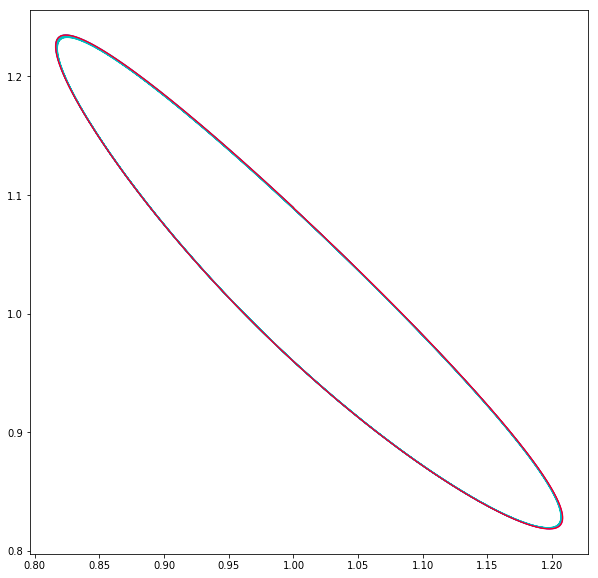

In [87]:
p=1.11
q=0.1
noise_lvl = 0.00001
Step = 0.001
cycl = get_cycle()
res = get_dp(cycl,sens=2.4)
crv = noisy_curve(cycl[0][0],cycl[1][0],100000)
minus = res['minus']
plus = res['plus']
plt.plot(crv[0],crv[1], c='c')
plt.plot(plus[0],plus[1],c='m', lw=1)
plt.plot(minus[0],minus[1],c='m' ,lw=1)
plt.plot(cycl[0],cycl[1],c='r',lw=1)
plt.show()

0.00085


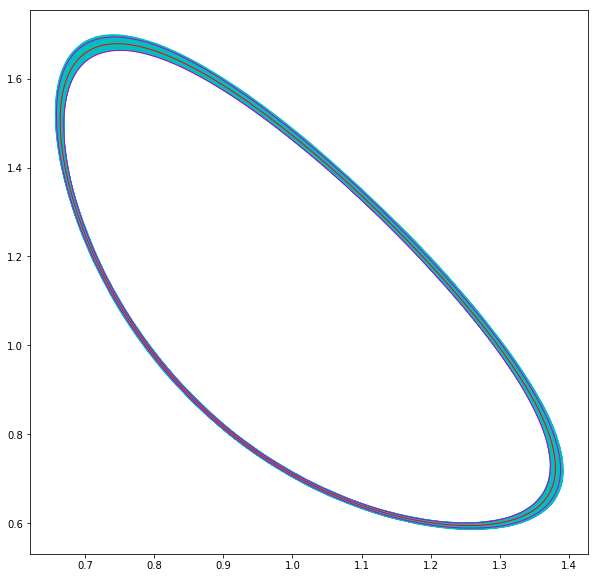

In [68]:
p=1.2
q=0.1
noise_lvl = 0.00085
Step = 0.001
cycl = get_cycle()
res = get_dp(cycl)
crv = noisy_curve(cycl[0][0],cycl[1][0],1000000)
minus = res['minus']
plus = res['plus']
plt.plot(crv[0],crv[1], c='c')
plt.plot(plus[0],plus[1],c='m', lw=1)
plt.plot(minus[0],minus[1],c='m' ,lw=1)
plt.plot(cycl[0],cycl[1],c='r',lw=1)
plt.show()

0.0025


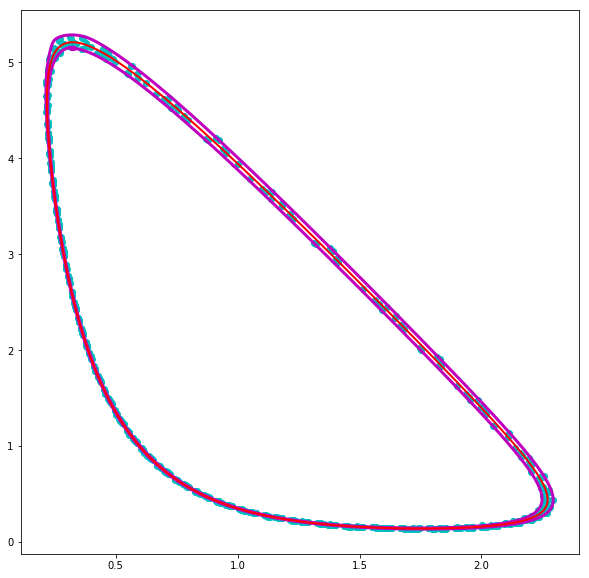

In [79]:
p=3
q=1
noise_lvl = 0.0025
Step = 0.001
cycl = get_cycle()
res = get_dp(cycl)
crv = noisy_curve(cycl[0][0],cycl[1][0],100000)
res_crv = [list(),list()]
for i in range(0 ,len(crv[0])-1):
    if i%150 == 0:
        res_crv[0].append(crv[0][i])
        res_crv[1].append(crv[1][i])
minus = res['minus']
plus = res['plus']
plt.plot(res_crv[0],res_crv[1], 'co')
plt.plot(plus[0],plus[1],c='m', lw=3)
plt.plot(minus[0],minus[1],c='m' ,lw=3)
plt.plot(cycl[0],cycl[1],c='r',lw=2)
plt.show()

0.01


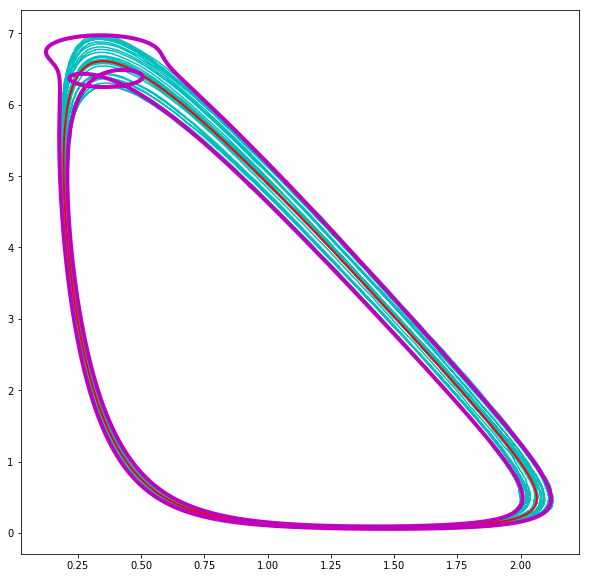

In [123]:
p=5
q=2
cycl = get_cycle()
res = get_dp(cycl, sens=2.4)
crv = noisy_curve(cycl[0][0],cycl[1][0],1000000)
minus = res['minus']
plus = res['plus']
plt.plot(crv[0],crv[1], c='c')
plt.plot(cycl[0],cycl[1],c='r',lw=2)
plt.plot(plus[0],plus[1],c='m', lw=4)
plt.plot(minus[0],minus[1],c='m' ,lw=4)
plt.show()

0.01


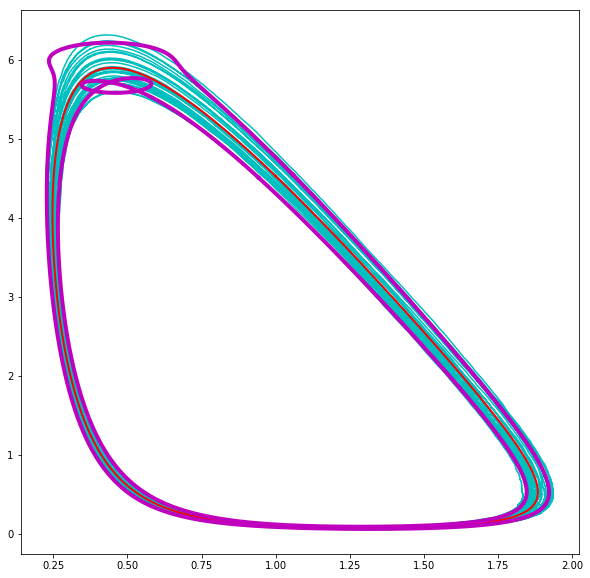

In [44]:
p=6
q=3
cycl = get_cycle()
res = get_dp(cycl,sens=2.4)
crv = noisy_curve(cycl[0][0],cycl[1][0],1000000)
minus = res['minus']
plus = res['plus']
plt.plot(crv[0],crv[1], c='c')
plt.plot(cycl[0],cycl[1],c='r',lw=2)
plt.plot(plus[0],plus[1],c='m', lw=4)
plt.plot(minus[0],minus[1],c='m' ,lw=4)
plt.show()